In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import math
from functools import partial
import multiprocessing
from time import sleep
import warnings

!pip install datatable > /dev/null
import datatable as dt

In [ ]:
df = pd.read_csv (r'lichess-08-2014.csv')
del df['ind']
df = df.iloc[:, :]
df = df.dropna()
print(df.head, df.columns)

<bound method NDFrame.head of                                                       PGN       Mode  \
0       1. e4 g6 2. d4 Bg7 3. c3 d6 4. Qf3 Nf6 5. h3 O...  Classical   
1       1. d4 Nf6 2. c4 g6 3. a3 Bg7 4. Nf3 O-O 5. Nc3...      Blitz   
2       1. e4 c5 2. Qf3 e5 3. Bc4 Nf6 4. Nh3 h6 5. g4 ...      Blitz   
3       1. e4 e5 2. Nf3 d6 3. Nc3 f5 4. exf5 Bxf5 5. d...      Blitz   
4       1. e4 e6 2. d4 d5 3. Nc3 Nf6 4. e5 Ne4 5. Nce2...     Bullet   
...                                                   ...        ...   
843225  1. d4 a6 2. Nf3 b5 3. Bf4 Bb7 4. Nc3 d6 5. e4 ...      Blitz   
843226  1. d3 d5 2. Nf3 f6 3. e3 e5 4. Nxe5 g6 5. Nf3 ...      Blitz   
843227  1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Ng5 d5 5. ex...      Blitz   
843228  1. e4 c5 2. f4 e6 3. Nf3 Ne7 4. c3 d5 5. Bb5+ ...      Blitz   
843229  1. e4 d6 2. Nf3 e6 3. Bc4 Qe7 4. d4 Nd7 5. Nc3...      Blitz   

            Result  Average Rating  Rating Difference Termination Type  
0       Black Wins            15

In [ ]:
#df['Termination Type'].unique()

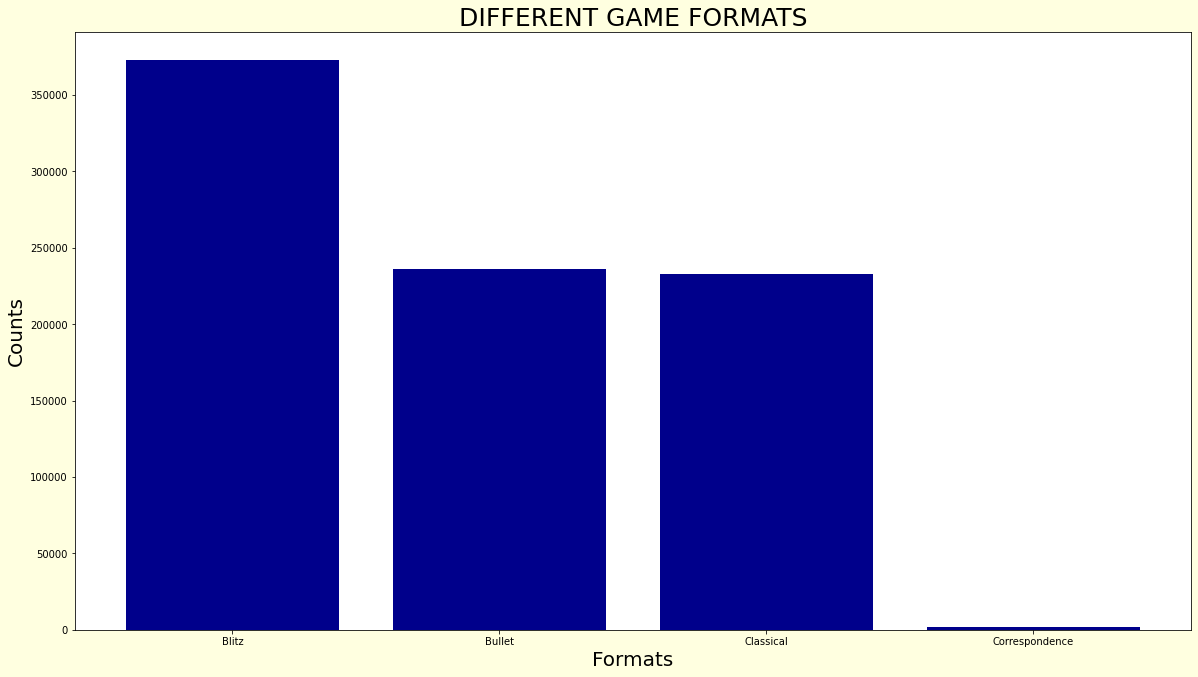

In [ ]:
def viz(x):
  dist = df[x].value_counts()
  fig = plt.figure(figsize = (20, 11), facecolor='lightyellow')
  plt.bar(dist.index.to_list() , dist.values, color = 'darkblue')

viz('Mode')
plt.xlabel('Formats', size = 20) 
plt.ylabel('Counts', size = 20) 
plt.title("DIFFERENT GAME FORMATS", size=25)
plt.show()

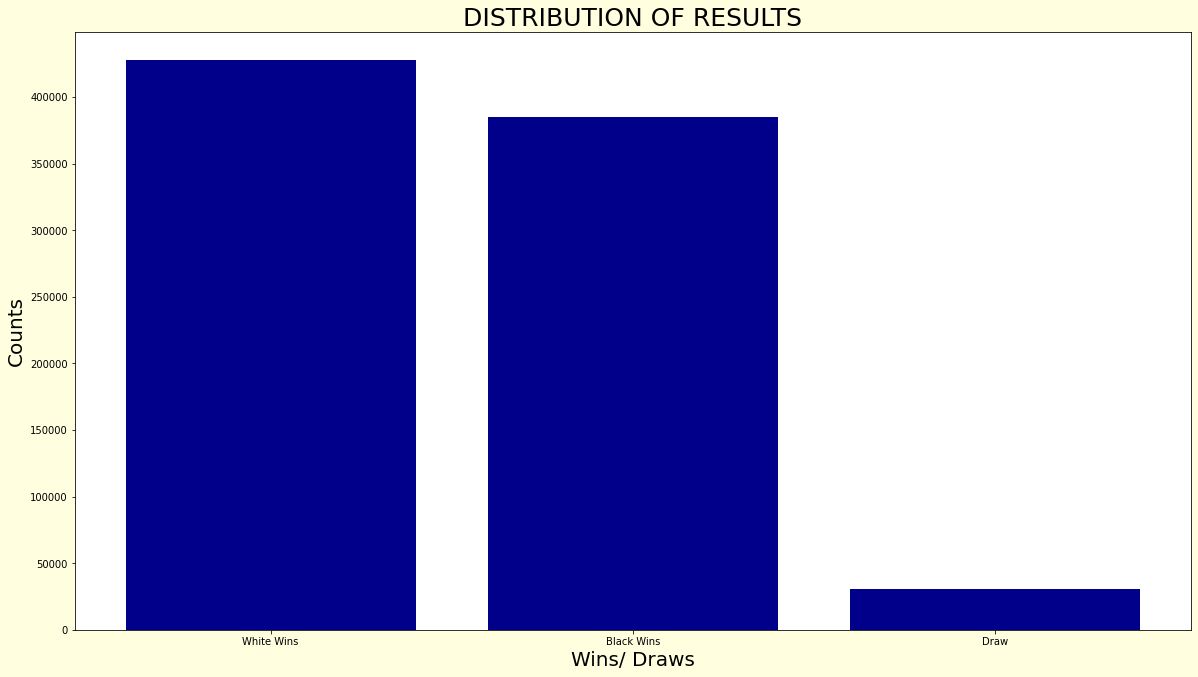

In [ ]:
viz('Result')
plt.xlabel('Wins/ Draws', size = 20) 
plt.ylabel('Counts', size = 20) 
plt.title("DISTRIBUTION OF RESULTS", size=25)
plt.show()

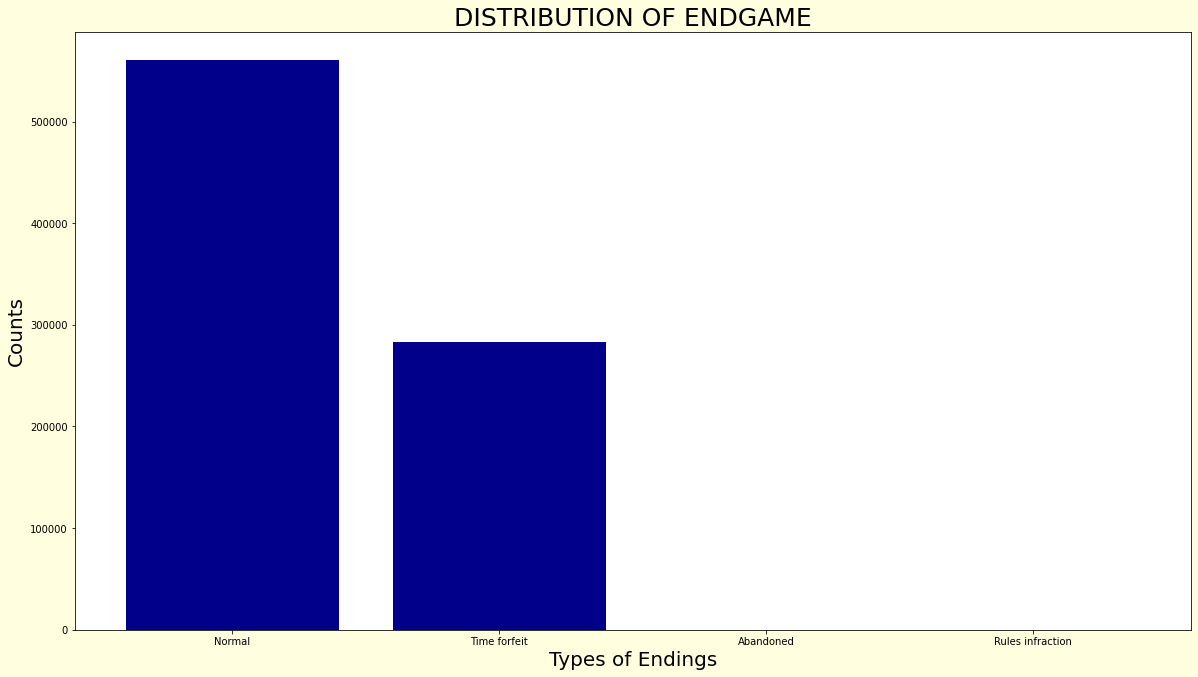

In [ ]:
viz('Termination Type')
plt.xlabel('Types of Endings', size = 20) 
plt.ylabel('Counts', size = 20) 
plt.title("DISTRIBUTION OF ENDGAME", size=25)
plt.show()

In [ ]:
avgrating = df['Average Rating']
print("Mean of Average Ratings: %.3f" % np.mean(avgrating))
print("Median of Average Ratings: %.3f" % np.median(avgrating))
print("Standard Deviation of Average Ratings: %.3f" % np.std(avgrating))
int_v1 = np.mean(avgrating)-2*np.std(avgrating)
int_v2 = np.mean(avgrating)+2*np.std(avgrating)
print("95%c confidence interval: %.3f to %.3f" % ('%', int_v1, int_v2))
qnt1 = np.quantile(avgrating, 0.025)
qnt2 = np.quantile(avgrating, 0.975)
print("95%c of data is between %.3f and %.3f" % ('%', qnt1, qnt2))

Mean of Average Ratings: 1628.876
Median of Average Ratings: 1623.000
Standard Deviation of Average Ratings: 214.678
95% confidence interval: 1199.520 to 2058.231
95% of data is between 1225.725 and 2063.000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


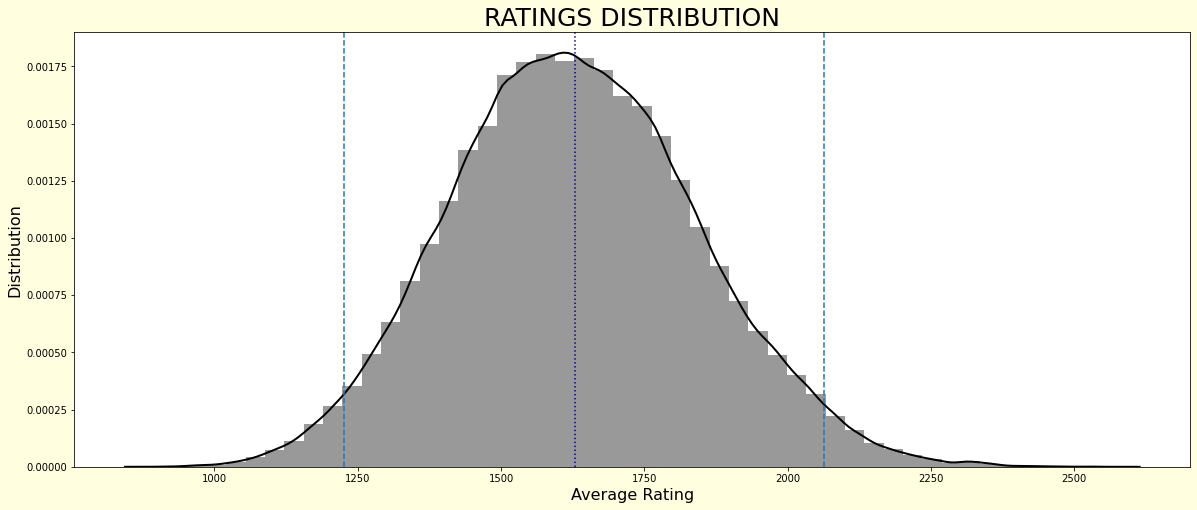

In [ ]:
plt.figure(figsize=(20, 8),facecolor='lightyellow')
sns.distplot(avgrating,kde_kws={'linewidth': 2}, color = 'black')
plt.axvline(x=qnt1, linestyle='--')
plt.axvline(x=qnt2, linestyle='--')
plt.axvline(x=np.mean(avgrating), linestyle=':', color ='darkblue')
plt.xlabel("Average Rating", fontsize=16)
plt.ylabel("Distribution", fontsize=16)
plt.title("RATINGS DISTRIBUTION", fontsize=25)
plt.show()

In [ ]:
print("Rating below 1300 (Beginner): %d" % (np.count_nonzero(avgrating < 1300)))
print("Rating 1300 - 1900 (Intermediate): %d" % (np.count_nonzero(avgrating < 1900) - np.count_nonzero(avgrating < 1300)))
print("Rating 1900 - 2200 (Advanced): %d" % (np.count_nonzero(avgrating < 2200) - np.count_nonzero(avgrating < 1900)))
print("Rating above 2200 (Master): %d" % (np.count_nonzero(avgrating >= 2200)))

Rating below 1300 (Beginner): 49041
Rating 1300 - 1900 (Intermediate): 703490
Rating 1900 - 2200 (Advanced): 86318
Rating above 2200 (Master): 4381


Mean-Length: 33.785
Median-Length: 32.000
Standard Deviation: 15.841
Longest Game: 191 moves


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


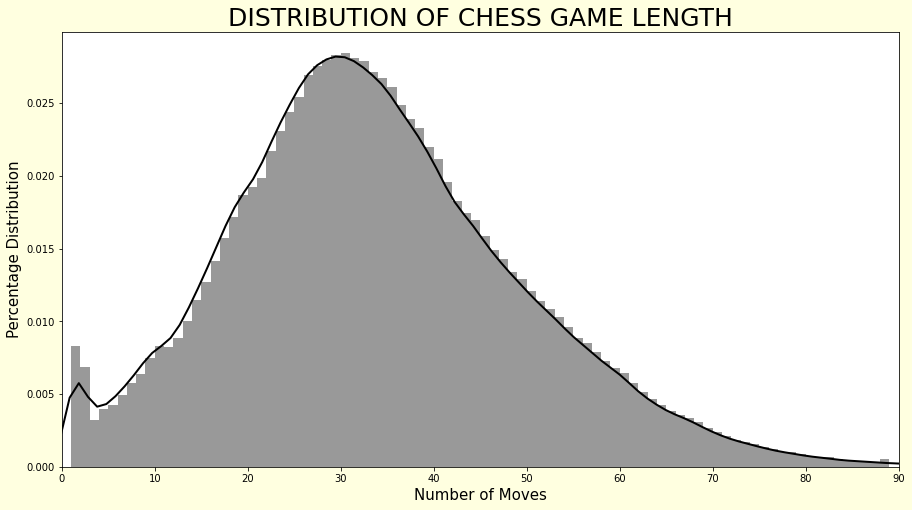

In [ ]:
length_arr = []

for game in df['PGN']:
    curlen = 1
    s = 0
    for i in range(len(game)):
        if game[i] == " ":
            s+=1
            if s==3:
                curlen+= 1
                s=0
        i+=1
    length_arr.append(curlen)
    
df['Moves'] = length_arr

def visualize_length(all_lengths, max_length):
    print("Mean-Length: %.3f" % np.mean(all_lengths))
    print("Median-Length: %.3f" % np.median(all_lengths))
    print("Standard Deviation: %.3f" % np.std(all_lengths))
    print("Longest Game: %d moves" % max(all_lengths))
    plt.figure(figsize=(15, 8),facecolor='lightyellow')
    bins = np.arange(0, max_length, 1)
    plt.title("DISTRIBUTION OF CHESS GAME LENGTH", fontsize=25)
    plt.xlabel("Number of Moves", fontsize=15)
    plt.ylabel("Percentage Distribution", fontsize=15)
    sns.distplot(all_lengths, bins, kde_kws = {'linewidth': 2},color = 'black')
    plt.xlim(0, max_length)
    
    return np.mean(all_lengths)

max_moves = 90
mean_length = visualize_length(df['Moves'].tolist(), max_moves)

In [ ]:
print(df, df.columns)

                                                      PGN       Mode  \
0       1. e4 g6 2. d4 Bg7 3. c3 d6 4. Qf3 Nf6 5. h3 O...  Classical   
1       1. d4 Nf6 2. c4 g6 3. a3 Bg7 4. Nf3 O-O 5. Nc3...      Blitz   
2       1. e4 c5 2. Qf3 e5 3. Bc4 Nf6 4. Nh3 h6 5. g4 ...      Blitz   
3       1. e4 e5 2. Nf3 d6 3. Nc3 f5 4. exf5 Bxf5 5. d...      Blitz   
4       1. e4 e6 2. d4 d5 3. Nc3 Nf6 4. e5 Ne4 5. Nce2...     Bullet   
...                                                   ...        ...   
843225  1. d4 a6 2. Nf3 b5 3. Bf4 Bb7 4. Nc3 d6 5. e4 ...      Blitz   
843226  1. d3 d5 2. Nf3 f6 3. e3 e5 4. Nxe5 g6 5. Nf3 ...      Blitz   
843227  1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Ng5 d5 5. ex...      Blitz   
843228  1. e4 c5 2. f4 e6 3. Nf3 Ne7 4. c3 d5 5. Bb5+ ...      Blitz   
843229  1. e4 d6 2. Nf3 e6 3. Bc4 Qe7 4. d4 Nd7 5. Nc3...      Blitz   

            Result  Average Rating  Rating Difference Termination Type  Moves  
0       Black Wins            1538               -262  

In [ ]:
def term_gamelen(games):
    tf_len = []
    nor_len = []
    ot_len = []
    for i in range(len(games['PGN'])):
        curlen = games['Moves'][i]
        if games['Termination Type'][i] == 'Time forfeit':
          tf_len.append(curlen)
        elif games['Termination Type'][i] == 'Normal':
          nor_len.append(curlen)
        else:
          ot_len.append(curlen)

    
    return tf_len, nor_len

term_len_list = term_gamelen(df)

Mean Length Time Forfeit: 34.980
Mean Length Normal: 33.190


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


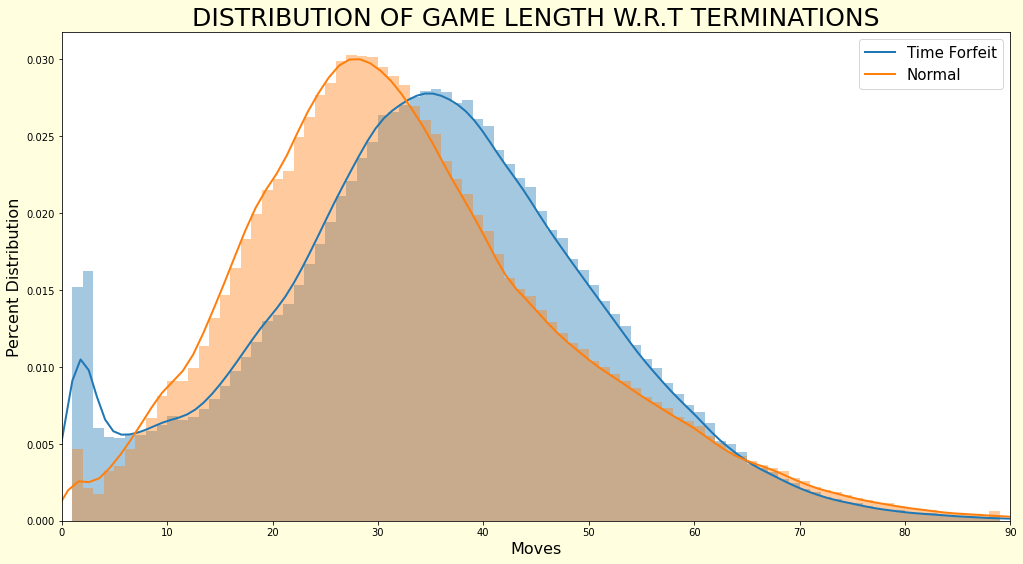

In [ ]:
def termination_visualize_length(term_len_list, max_length, shade=False):
    terminate_l = []
    for length in term_len_list[0]:
        terminate_l.append(length)
         
    normal_list = []
    for length in term_len_list[1]:
        normal_list.append(length)
            
    plt.figure(figsize=(17, 9),facecolor='lightyellow')
    bins = np.arange(0, max_length, 1)
    plt.title("DISTRIBUTION OF GAME LENGTH W.R.T TERMINATIONS", fontsize=25)
    plt.xlabel("Moves", fontsize=16)
    plt.ylabel("Percent Distribution", fontsize=16)
    print("Mean Length Time Forfeit: %.3f" % np.mean(terminate_l))
    print("Mean Length Normal: %.3f" % np.mean(normal_list))

    sns.distplot(terminate_l, bins, kde_kws = {'linewidth': 2})
    sns.distplot(normal_list, bins, kde_kws = {'linewidth': 2})
    plt.xlim(0, max_length)
    plt.legend(["Time Forfeit", "Normal"],fontsize=15)

termination_visualize_length(term_len_list, max_moves)

In [ ]:
def rat_game_leng(games, rating_range=[750, 1300, 1900, 2250]):
    rating_dict = {}
    for rating in rating_range:
        rating_dict[rating] = []
        
    for i in range(len(games['PGN'])):
        rtype = -1
        for j in range(len(rating_range)):
            if j == 0:
                continue
            if games['Average Rating'][i] > rating_range[j]:
                rtype = rating_range[j-1]       
        if rtype == -1:
            rtype = 2250
        
        curlen = games['Moves'][i]
        rating_dict[rtype].append(curlen)  
    return rating_dict

rating_lenl = rat_game_leng(df)

In [ ]:
def rating_visualize_length(rating_lenl, max_length, rating_range=[750, 1300, 1900, 2250], shade=False):
    rating_dict = [[] for i in range(len(rating_range))]
    r = 0
    for rating in rating_lenl:
        for length in rating_lenl[rating]:
            rating_dict[r].append(length)
        r+=1
            
    plt.figure(figsize=(16, 8),facecolor='lightyellow')
    bins = np.arange(0, max_length, 1)
    plt.title("DISTRIBUTION: GAME LENGTH WITH RATINGS", fontsize=25)
    plt.xlabel("Number of Moves", fontsize=15)
    plt.ylabel("Percent Distribution", fontsize=15)
    if shade:
        for rating in rating_dict:
            sns.distplot(rating, bins, hist=False, kde_kws = {'linewidth': 2, 'shade': True})
    else:
        for rating in rating_dict:
            sns.distplot(rating, bins, kde_kws = {'linewidth': 2})
        r = 0
        for rating in rating_range:
            print("%s+ Mean: %.3f" % (rating, np.mean(rating_dict[r])))
            r += 1
    
    labelrange = []
    for rating in rating_range:
        labelrange.append(str(rating) + '+')
    plt.legend(labelrange)
    plt.xlim(0, max_length)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

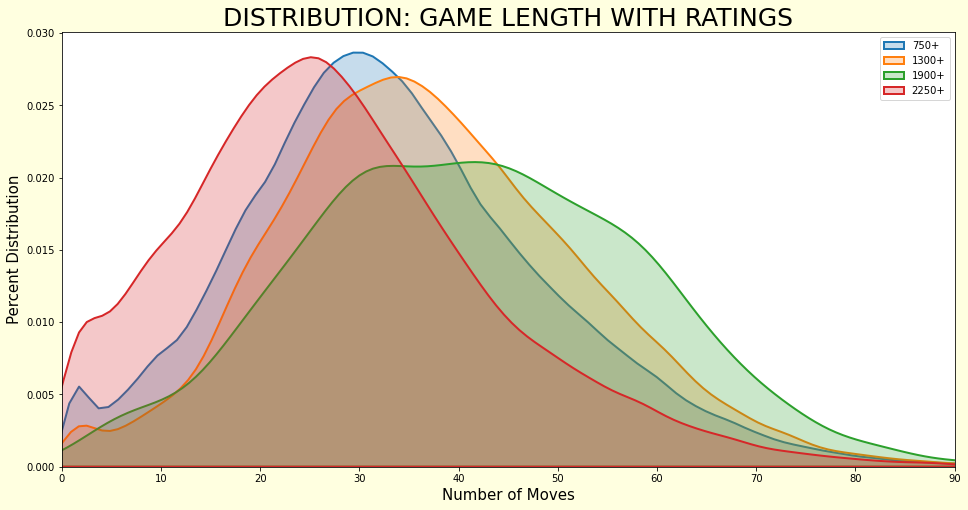

In [ ]:
rating_visualize_length(rating_lenl, max_moves, shade=True)

In [ ]:
splits = multiprocessing.cpu_count()
def multi_split(df, splits):
    if __name__ == "__main__":
        length = len(df)
        steps = math.ceil(length/splits)
        input_games = []
        for x in range(splits):
            input_games.append(df[steps*x:steps*(x+1)].reset_index())
    
    return input_games

input_games = multi_split(df, splits)

In [ ]:
def piece_prob(games, castling=False):
    prob_dict = {}
    pieces = ['P', 'B', 'N', 'R', 'Q', 'K']
    pawn = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

    #chess board representation in dictionary format
    for p in pieces:
        chess_dict = {}
        for horizontal in pawn:
            for vertical in range(1, 9):
                chess_dict[horizontal+str(vertical)] = 0
        prob_dict[p] = chess_dict

    for game in games['PGN']:
        curr_move = False
        s = ""
        pieceID = ""
        for index in range(len(game)):
            if game[index] == " " and curr_move:
                if pieceID == 'O':
                    white = 1-white
                    continue
                    
                curr_move = False
                if len(s) >= 4:
                    # Determine a promotion, e.g. e8=Q
                    s1 = s[0:2]
                    
                    # some moves, exd1=Q+ cannot be solve without manual intervention
                    try:
                        prob_dict[pieceID][s1] += 0
                    except:
                        s1 = s[1:3]
                elif len(s) == 3:
                    # Determine some conditions, e.g. Ngf6 (which is read as gf6) or exf6 (which is read as ef6)
                    s1 = s[len(s)-2:len(s)]
                else:
                    s1 = s
                
                try:
                    prob_dict[pieceID][s1] += 1
                except:
                    print(game)
                    raise Exception("There is an error in the code at this game.")
                
                # Reset string
                s = "" 
            elif curr_move:
                if game[index] != 'x' and game[index] != '+' and game[index] != '#' and game[index] != '!' and game[index] != '?':
                    # Captures, checks, checkmates notations
                    s += game[index]
            elif game[index] in pawn:
                pieceID = 'P' 
                curr_move = True
              
                s += game[index]
            elif game[index] in pieces:
                pieceID = game[index]
                curr_move = True
            elif game[index] == 'O' and castling:
                try:
                    if game[index+1] == '-':
                        if game[index+3] == '-':
                            # Queenside-castling
                            if game[index-2] == '.':
                                prob_dict['K']['c1'] += 1
                                prob_dict['R']['d1'] += 1
                            else:
                                prob_dict['K']['c8'] += 1
                                prob_dict['R']['d8'] += 1
                        else:
                            # Kingside-castling
                            if game[index-2] == '.':
                                prob_dict['K']['g1'] += 1
                                prob_dict['R']['f1'] += 1
                            else:
                                prob_dict['K']['g8'] += 1
                                prob_dict['R']['f8'] += 1
                except:
                    pass

    return prob_dict

with multiprocessing.Pool(processes=splits) as pool:
    %time prob_list = pool.map(partial(piece_prob, castling=False), input_games)

CPU times: user 2.2 s, sys: 2.31 s, total: 4.51 s
Wall time: 2min 49s


In [ ]:
def visualize_piece_prob(prob_list, visualize_list_raw=['Pawn', 'Bishop', 'Knight', 'Rook', 'Queen', 'King'], vis_percentage=True, seaborn=True):
    """
    Driver function for visualizing the probability that each chess piece lands on a certain square
    Utilizes seaborn heatmap, if set to false, will use matplotlib heatmap
    """
    P_dict = {}
    pieces = ['P', 'B', 'N', 'R', 'Q', 'K']
    pawn = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    for p in pieces:
        chess_dict = {}
        for horizontal in pawn:
            for vertical in range(1, 9):
                chess_dict[horizontal+str(vertical)] = 0
        P_dict[p] = chess_dict

    for prob_dict in prob_list:
        for piece in prob_dict:
            for key in prob_dict[piece]:
                P_dict[piece][key] += prob_dict[piece][key]
    
    visualize_list = []
    for label in visualize_list_raw:
        if label == 'Knight':
            visualize_list.append('N')
        else:
            visualize_list.append(label[0])
    
    if seaborn:
        fig, ax = plt.subplots(len(visualize_list), figsize=(12, len(visualize_list)*8))
        r = 0
        for piece in P_dict:
            if piece not in visualize_list:
                continue

            vallist = list(P_dict[piece].values())
            summ = sum(vallist)
            plot_list = []
            for i in np.arange(7, -1, -1):
                templist = []
                for j in range(8):
                    if vis_percentage:
                        templist.append(vallist[i+8*j]/summ)
                    else:
                        templist.append(vallist[i+8*j])
                plot_list.append(templist)

            heatmap = sns.heatmap(plot_list, cmap='YlOrRd', annot=True, fmt=".3%" if vis_percentage else "d", ax=ax[r], 
                                  cbar_kws={'label': 'Proportion out of 1' if vis_percentage else 'RawC'})
            ax[r].set_title("%s of %s Moving to Square on Chessboard" % ('Probability' if vis_percentage else 'RawC', visualize_list_raw[r]), fontsize=16)
            ax[r].set_xticklabels(pawn, fontsize=14)
            ax[r].set_yticklabels(np.arange(8, 0, -1), fontsize=14)
            r += 1

        fig.tight_layout()
        plt.subplots_adjust(hspace=0.3)
        plt.show()
    else:    
        for piece in P_dict:
            if piece not in visualize_list:
                continue

            vallist = list(P_dict[piece].values())
            summ = sum(vallist)
            plot_list = []
            for i in np.arange(7, -1, -1):
                templist = []
                for j in range(8):
                    if vis_percentage:
                        templist.append(round(vallist[i+8*j]/summ*100, 3))
                    else:
                        templist.append(vallist[i+8*j])
                plot_list.append(templist)

            plt.figure(figsize=(12, 8))
            plt.imshow(plot_list, cmap='YlOrRd', interpolation='nearest')
            cbar = plt.colorbar()
            if vis_percentage:
                cbar.set_label("Probability (Percentage)", rotation=270, fontsize=16, labelpad=20)
            else:
                cbar.set_label("RawC", rotation=270, fontsize=16, labelpad=20)
            for i in range(8):
                for j in range(8):
                    tmp_str = str(plot_list[i][j])
                    if vis_percentage:
                        tmp_str += "%"

                    plt.text(j, i, tmp_str, ha="center", va="center", color="black")

            plt.title("%s of %s Moving to Square on Chessboard" % ('Probability' if vis_percentage else 'RawC', piece), fontsize=16)
            plt.xticks(np.arange(0, 8), pawn, fontsize=14)
            plt.yticks(np.arange(0, 8), np.arange(8, 0, -1), fontsize=14)

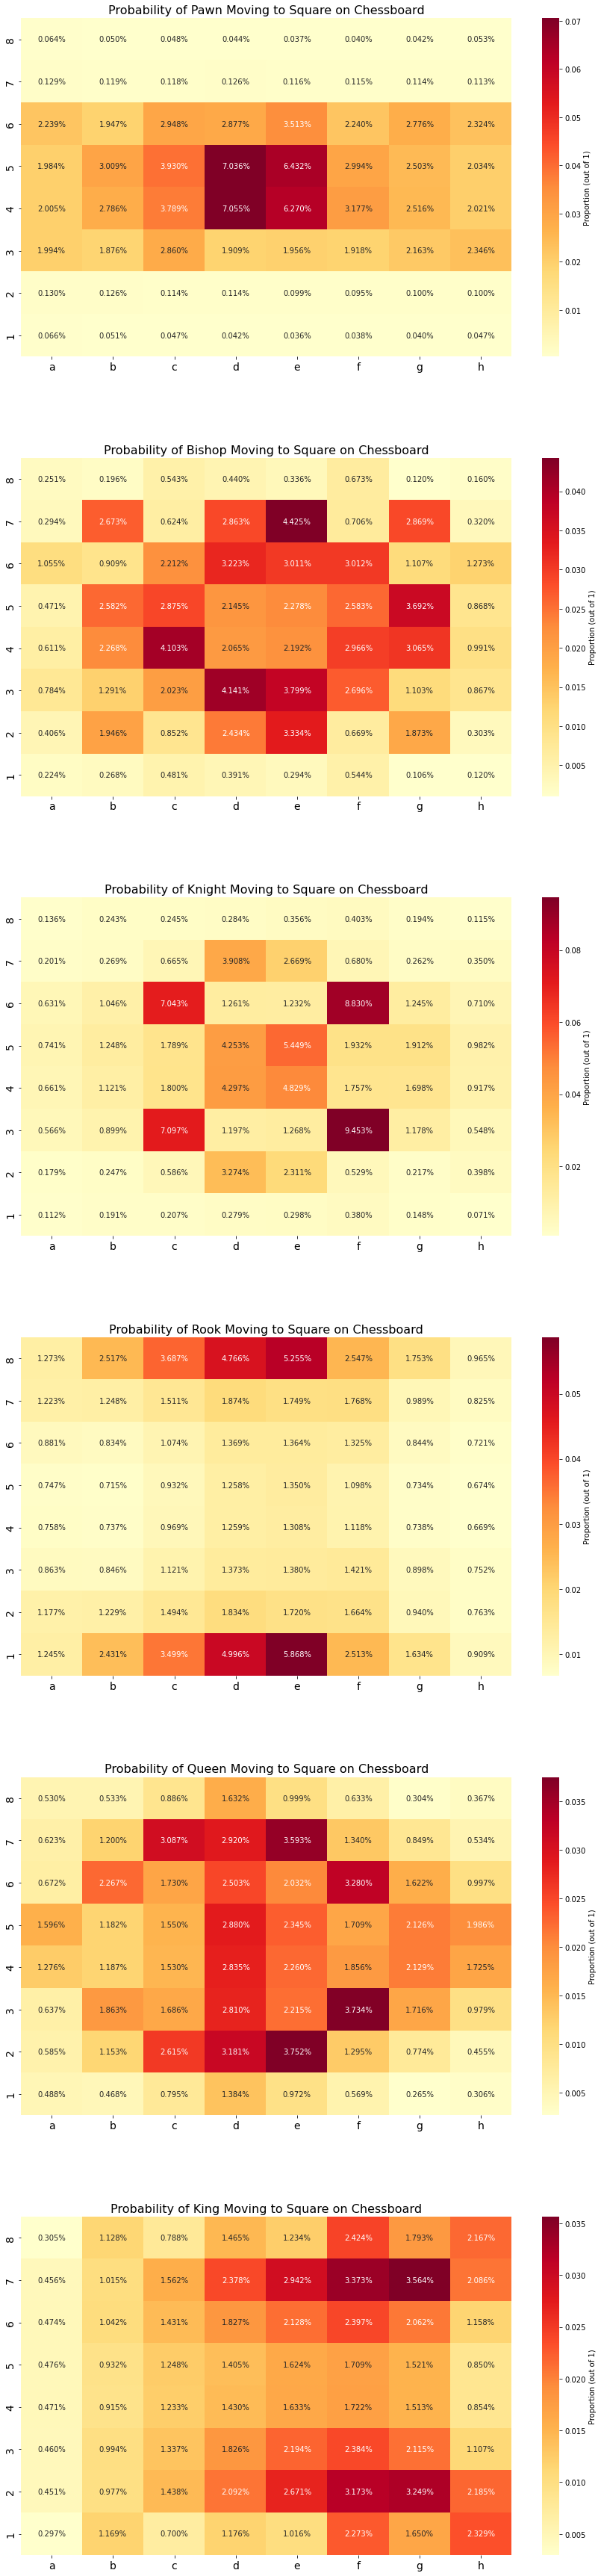

In [ ]:
visualize_piece_prob(prob_list)

In [ ]:
def prob_over_time(games, max_moves):
    pawn = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    pieces = ['B', 'N', 'R', 'Q', 'K', 'O']    
    time_dict = {}
    for i in range(1, max_moves+1):
        time_dict[i] = {'P': 0, 'B': 0, 'N': 0, 'R': 0, 'Q': 0, 'K': 0, 'O': 0}
    
    for game in games['PGN']:
        curr_move = False
        curr_length = 1
        space = 0
        for index in range(len(game)):
            if game[index] == " ":
                space += 1
                if space == 3:
                    if curr_length<max_moves:
                        curr_length += 1
                    space = 0
                curr_move = False
            elif curr_move:
                continue
            elif game[index] in pawn:
                time_dict[curr_length]['P'] += 1
                curr_move = True
            elif game[index] in pieces:
                time_dict[curr_length][game[index]] += 1
                curr_move = True

    return time_dict

with multiprocessing.Pool(processes=splits) as pool:
    %time time_list = pool.map(partial(prob_over_time, max_moves=max_moves), input_games)

CPU times: user 1.8 s, sys: 1.36 s, total: 3.16 s
Wall time: 1min 40s


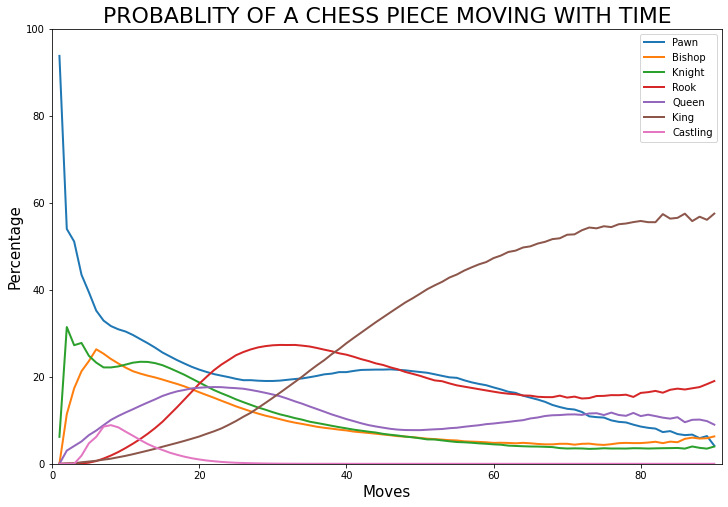

In [ ]:
def prob_over_time(time_list, max_moves):
    labels = ['Pawn', 'Bishop', 'Knight', 'Rook', 'Queen', 'King', 'Castling']
    T_dict = [[0 for j in range(max_moves)] for i in range(len(labels))]
    
    for t_dict in time_list:
        for time in t_dict:
            r = 0
            for piece in t_dict[time]:
                T_dict[r][time-1] += t_dict[time][piece]
                r += 1
                
    for i in range(max_moves):
        summ = 0
        for t in range(len(labels)):
            summ += T_dict[t][i]
        
        for t in range(len(labels)):
            T_dict[t][i] /= summ/100
    
    plt.figure(figsize=(12, 8))
    
    for i in range(len(labels)):
        plt.plot(np.arange(1, max_moves+1, 1), T_dict[i], linewidth=2)
    
    plt.legend(labels)
    plt.xlim(0, max_moves+1)
    plt.ylim(0, 100)
    plt.title("PROBABLITY OF A CHESS PIECE MOVING WITH TIME", fontsize=22)
    plt.xlabel("Moves", fontsize=15)
    plt.ylabel("Percentage", fontsize=15)
    
prob_over_time(time_list, max_moves)

In [ ]:
chess_openings={'The Italian Game':'1. e4 e5 2. Nf3 Nc6 3. Bc4', 'The Sicilian Defense': '1. e4 c5',
                'The French Defense': '1. e4 e6','The Ruy-Lopez':'1. e4 e5 2. Nf3 Nc6 3. Bb5',
                'Alekhine Defense':'1. e4 Nf6','Caro-Kann':'1. e4 c6',"King's Gambit":'1. e4 e5 2. f4', 
                'Dutch Defense':'1. d4 f5',
                "King's Indian":'1. d4 Nf6 2. c4 g6','Nimzo-Indian':'1. d4 Nf6 2. c4 e6 3. Nc3 Bb4',
                'Petrov Defense':'1. e4 e5 2. Nf3 Nf6', 'Englund Gambit':'1. d4 e5',
                "Queen's Gambit":'1. d4 d5 2. c4','Reti Opening':'1. Nf3 d5 2. c4',"Bird's Opening":'1. f4',
                'Scotch Game':'1. e4 e5 2. Nf3 Nc6 3. d4', 'Modern Defence': '1. e4 g6', 'Ponziani Opening':'1. e4 e5 2. Nf3 Nc6 3. c3',
                'Philidor Defence':'1. e4 e5 2. Nf3 d6',"Owen's Defence":"1. e4 b6"}

In [ ]:
ol = [[key for key,values in chess_openings.items() if x[0:len(values)] == values] for x in df['PGN']]
df['Openings'] = ol
df['Openings'] = df['Openings'].apply(lambda x: ','.join(map(str, x)))
df.Openings = df.Openings.apply(lambda y: np.nan if len(y)==0 else y)
#x = df.groupby('Openings', sort=False)['Openings'].count()

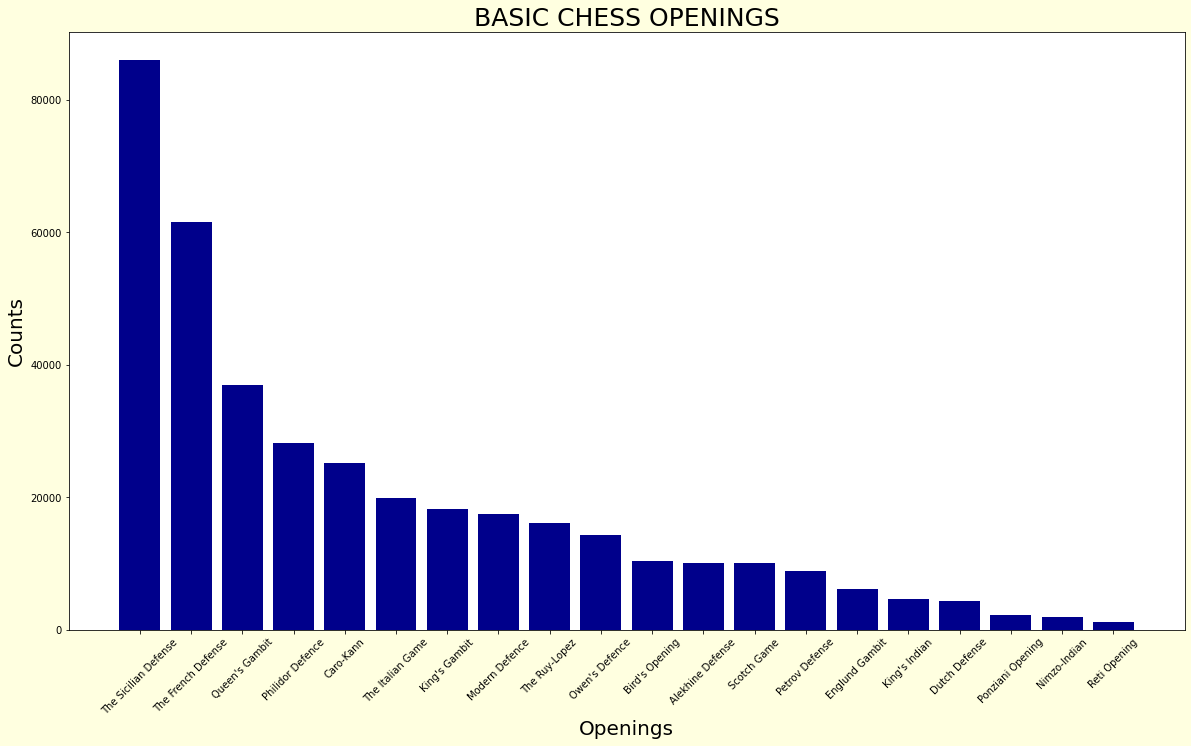

In [ ]:
viz('Openings')
plt.xlabel('Openings', size = 20) 
plt.ylabel('Counts', size = 20) 
plt.title("BASIC CHESS OPENINGS", size=25)
plt.xticks(rotation=45)
plt.show()